In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
titanic = pd.read_csv('./data/train.csv')

In [3]:
display(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Create a bar chart of missing values per column

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<BarContainer object of 12 artists>

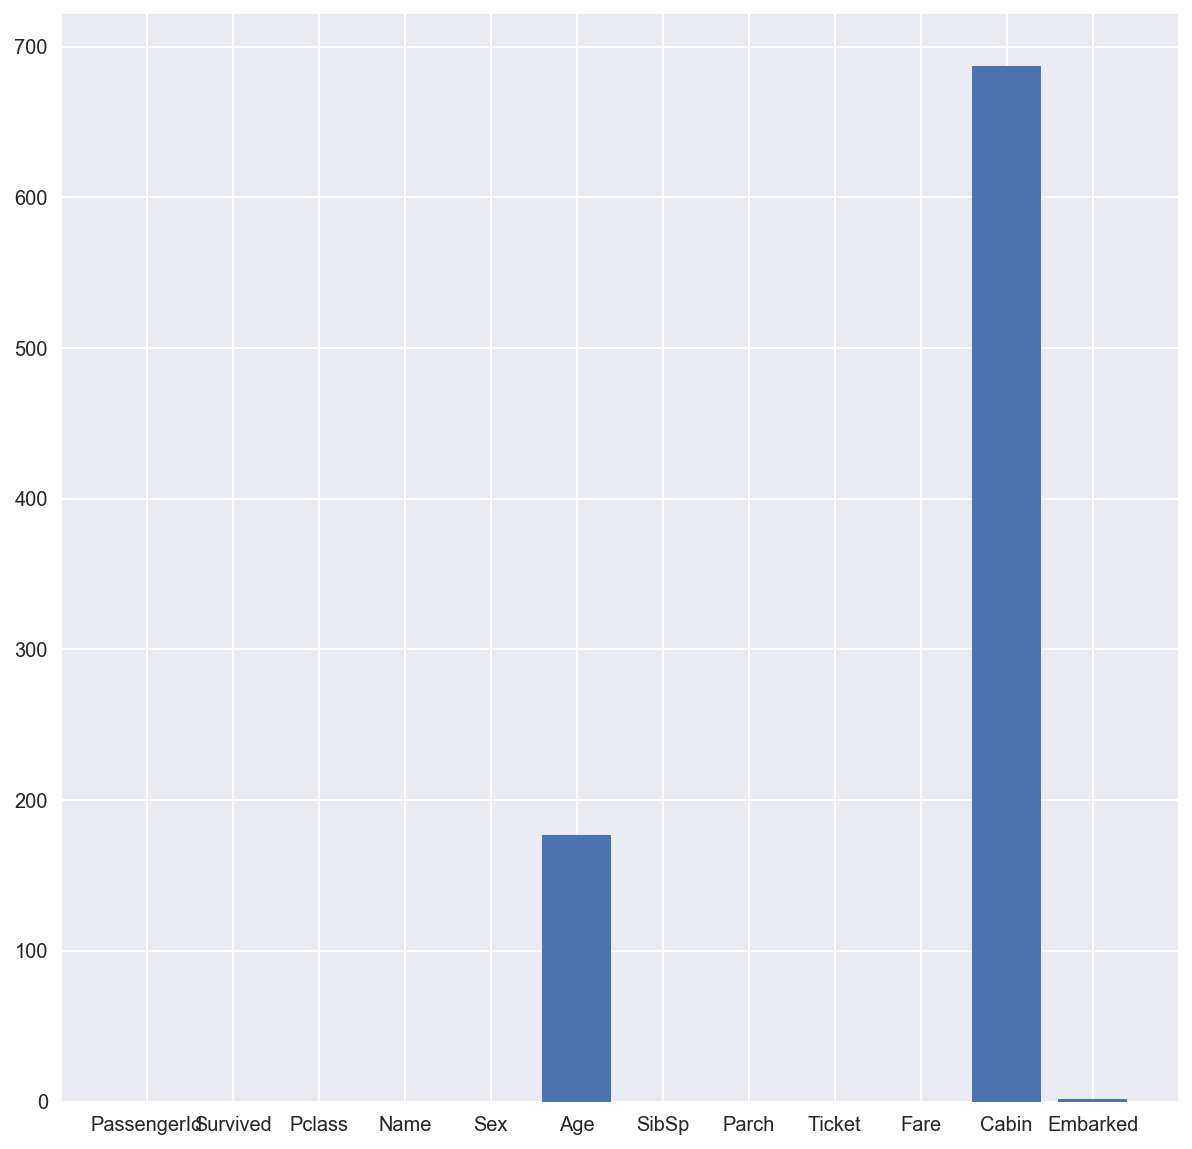

In [5]:
plt.figure(figsize=(10, 10))
plt.bar(titanic.columns, titanic.isnull().sum())

# Which column has the most NaN values? How many cells in that column are empty?

Cabin is missing 687 values

# Delete all rows where Embarked is empty

In [6]:
titanic[titanic['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
# drop the rows where embarked is null
titanic = titanic[titanic['Embarked'].isnull() == False]

# Fill all empty cabins with ¯\(ツ)/¯

In [8]:
titanic['Cabin'].fillna('¯(ツ)/¯', inplace=True)
# or
# df.Cabin = df.Cabin.replace(np.nan,'¯\(ツ)/¯')
# bonus: does map work?

# There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.

In [9]:
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

# Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

In [10]:
titanic['isReverend'] = titanic['Name'].str.contains('Rev.')
# or
# isReverend = lambda x: 1 if 'Rev.' in x else 0
# titanic['IsReverend'] = titanic['Name'].map(isReverend)

# In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies
#### Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
#### Do the same thing for Sex
#### BONUS: Extract the title from everyone's name and create dummy columns

In [11]:
titanic = pd.get_dummies(titanic, columns=['Embarked', 'Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,isReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯(ツ)/¯,1,False,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,False,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯(ツ)/¯,0,False,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,False,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯(ツ)/¯,0,False,0,0,1,0,1


1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each Pclass?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked ¯\(ツ)/¯
6. What is the survival rate for people whose Age is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each Pclass?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [12]:
titanic['Survived'].mean()

0.38245219347581555

In [13]:
titanic.groupby(['Sex_male'])['Survived'].mean()

Sex_male
0    0.740385
1    0.188908
Name: Survived, dtype: float64

In [14]:
titanic.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [21]:
titanic[(titanic['isReverend'] == 1) & (titanic['Survived'] == 1)]
#titanic.groupby(['isReverend'])['Survived'].mean()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,isReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male


In [16]:
# not sure why it behaves like this
titanic[(titanic['Cabin'] == '¯(ツ)/¯') & (titanic['Survived'] == 1)].mean()

PassengerId    424.189320
Survived         1.000000
Pclass           2.456311
Age             24.680303
SibSp            0.456311
Parch            0.470874
Fare            25.632706
FamilyCount      0.927184
isReverend       0.000000
Embarked_C       0.199029
Embarked_Q       0.135922
Embarked_S       0.665049
Sex_female       0.689320
Sex_male         0.310680
dtype: float64

In [17]:
titanic[titanic['Age'].isnull() == True]['Survived'].mean()

0.2937853107344633

In [18]:
titanic[(titanic['Embarked_C']) & (titanic['Survived'] == 1)].shape[0]

93

In [19]:
titanic[(titanic['Embarked_Q']) & (titanic['Survived'] == 1)].shape[0]

30

In [20]:
titanic[(titanic['Embarked_S']) & (titanic['Survived'] == 1)].shape[0]

217

In [43]:
titanic[titanic['Age'] < 12].groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [38]:
titanic[titanic['Name'].str.contains('Capt.')]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,isReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,2,False,0,0,1,0,1


In [40]:
titanic[titanic['Survived'] == 0].sort_values('Fare', ascending=False).head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,isReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0,C23 C25 C27,5,False,0,0,1,0,1
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0,C23 C25 C27,5,False,0,0,1,0,1


In [41]:
titanic.groupby('FamilyCount')['Survived'].mean()

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64